In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
from iqradre.prod.idcard import IDCardPredictor
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option("max_rows", None)

In [4]:
%%time
config = {
    'detector': f'../weights/detect/craft_ktp_ohem.pth.tar',
    'recognitor': f'../weights/recog/ocrnet_pretrained_ktp.pth',
    'extractor': f'../weights/extract/layoutlm_v2.pth',
    'tokenizer': "indobenchmark/indobert-base-p2"   
}

idcard = IDCardPredictor(config, device='cpu')

INFO: Load all model, please wait...


Some weights of the model checkpoint at microsoft/layoutlm-base-uncased were not used when initializing LayoutLMForTokenClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing LayoutLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LayoutLMForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of LayoutLMForTokenClassification were not initialized from the model checkpoint at microsoft

INFO: All model has been loaded!
CPU times: user 5.52 s, sys: 752 ms, total: 6.28 s
Wall time: 10.2 s


In [29]:
%%time
impath = 'images/test3.png'
pred_data = idcard.predict(impath)

CPU times: user 9.52 s, sys: 118 ms, total: 9.64 s
Wall time: 1.69 s


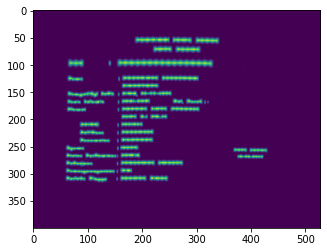

In [30]:
plt.imshow(pred_data['score']);plt.show()

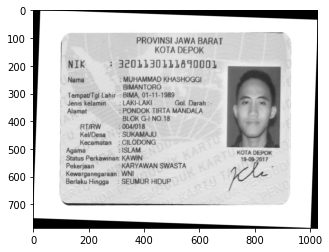

In [31]:
plt.imshow(pred_data['image']);plt.show()

In [32]:
pred_data['prediction']

{'provinsi': 'PROVINSI JAWA BARAT',
 'kabupaten': 'KOTA DEPOK',
 'nik': '3201130111890001',
 'nama': 'LEK MUHAMMADI BIMANTORO KHASHOGGI THingga S,',
 'ttl': 'BIMA, 01-11-1989',
 'gender': 'LAKI-LAKI',
 'goldar': '--',
 'alamat': 'Ser PONDOK BLOK GIQ TIRTA NO.18 MANDALA',
 'rtrw': '004/018',
 'kelurahan': 'SUKAMAJU',
 'kecamatan': 'CILODONG',
 'agama': 'ISLAM',
 'perkawinan': 'KAWIN',
 'pekerjaan': 'KARYAWAN SWASTA',
 'kewarganegaraan': 'WNIT',
 'berlaku': 'SEUMUR HIDUP',
 'sign_place': 'KOTA PEPOK',
 'sign_date': '19-09-2017'}

In [33]:
pred_data['dataframe']

,words,bboxes,tokens,labels,gseq,wseq
0,JAWA,"[508.0, 93.0, 585.0, 126.0]",jawa,B-VAL_PROV,0,0
1,PROVINSI,"[370.0, 94.0, 506.0, 124.0]",provinsi,U-FLD_PROV,1,0
2,BARAT,"[590.0, 94.0, 686.0, 128.0]",barat,L-VAL_PROV,2,0
3,KOTA,"[434.0, 126.0, 514.0, 158.0]",kota,U-FLD_KAB,3,0
4,DEPOK,"[518.0, 127.0, 617.0, 161.0]",depok,U-VAL_KAB,4,0
5,3201130111890001,"[302.0, 172.0, 663.0, 214.0]",320,B-VAL_NIK,5,0
6,3201130111890001,"[302.0, 172.0, 663.0, 214.0]",##113,I-VAL_NIK,5,1
7,3201130111890001,"[302.0, 172.0, 663.0, 214.0]",##01,I-VAL_NIK,5,2
8,3201130111890001,"[302.0, 172.0, 663.0, 214.0]",##118,I-VAL_NIK,5,3
9,3201130111890001,"[302.0, 172.0, 663.0, 214.0]",##9000,I-VAL_NIK,5,4
